In [ ]:
!pip install tensorflow==2.12.0 streamlit==1.27.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 87.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.8 MB/s eta 0:00:00

In [ ]:
!pip uninstall keras
!pip install keras==2.12.0

Found existing installation: keras 2.12.0
Uninstalling keras-2.12.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/keras-2.12.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/keras/*
Proceed (Y/n)? Y
  Successfully uninstalled keras-2.12.0
  Using cached keras-2.12.0-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.12.0 which is incompatible.


In [ ]:
import tensorflow as tf
import keras
print(tf.__version__)
print(keras.__version__)

2.12.0
2.12.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
print(os.listdir("/content/drive/My Drive/Brain_Tumor"))


Mounted at /content/drive
['Training', 'Testing']


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
for dirname, _, filenames in os.walk("/content/drive/My Drive/Brain_Tumor"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/My Drive/Brain_Tumor/Training/pituitary_tumor/p (323).jpg
/content/drive/My Drive/Brain_Tumor/Training/pituitary_tumor/p (480).jpg
/content/drive/My Drive/Brain_Tumor/Training/pituitary_tumor/p (237).jpg
/content/drive/My Drive/Brain_Tumor/Training/pituitary_tumor/p (475).jpg
/content/drive/My Drive/Brain_Tumor/Training/pituitary_tumor/p (220).jpg
/content/drive/My Drive/Brain_Tumor/Training/pituitary_tumor/p (472).jpg
/content/drive/My Drive/Brain_Tumor/Training/pituitary_tumor/p (136).jpg
/content/drive/My Drive/Brain_Tumor/Training/pituitary_tumor/p (158).jpg
/content/drive/My Drive/Brain_Tumor/Training/pituitary_tumor/p (456).jpg
/content/drive/My Drive/Brain_Tumor/Training/pituitary_tumor/p (345).jpg
/content/drive/My Drive/Brain_Tumor/Training/pituitary_tumor/p (386).jpg
/content/drive/My Drive/Brain_Tumor/Training/pituitary_tumor/p (415).jpg
/content/drive/My Drive/Brain_Tumor/Training/pituitary_tumor/p (396).jpg
/content/drive/My Drive/Brain_Tumor/Training/pituit

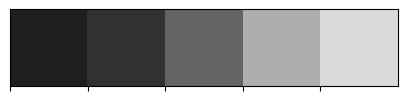

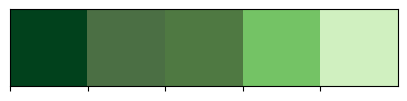

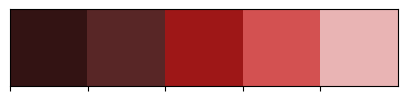

In [ ]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

In [ ]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

In [ ]:
X_train = []
y_train = []
image_size = 150
for i in labels:
    folderPath = os.path.join("/content/drive/My Drive/Brain_Tumor","Training",i)
    for j in tqdm(os.listdir(folderPath)):
        if not j.startswith('.'): #Added to ignore hidden files and folders
            img = cv2.imread(os.path.join(folderPath,j))
            if img is not None:  # Check if image loaded successfully
                img = cv2.resize(img,(image_size,image_size))
                X_train.append(img)
                y_train.append(i)

for i in labels:
    folderPath = os.path.join("/content/drive/My Drive/Brain_Tumor","Testing",i)
    for j in tqdm(os.listdir(folderPath)):
        if not j.startswith('.'): #Added to ignore hidden files and folders
            img = cv2.imread(os.path.join(folderPath,j))
            if img is not None:  # Check if image loaded successfully
                img = cv2.resize(img,(image_size,image_size))
                X_train.append(img)
                y_train.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 74/74 [00:21<00:00,  3.49it/s]


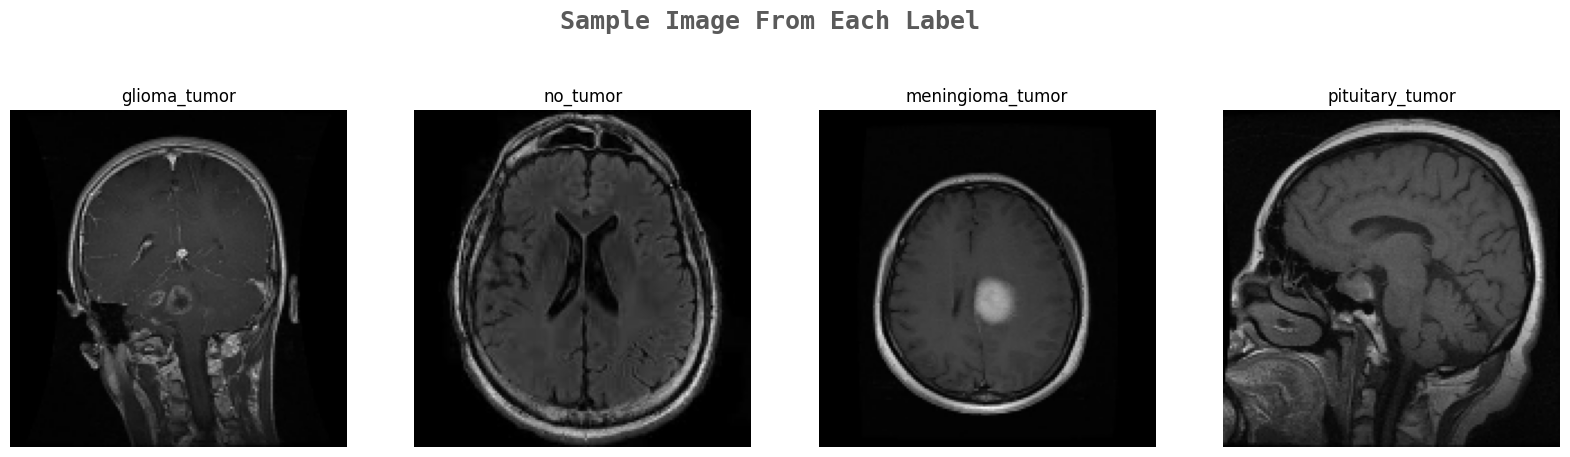

In [ ]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',fontname='monospace',color=colors_dark[1],y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [ ]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [ ]:
X_train.shape

(3265, 150, 150, 3)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
effnet = ResNet50(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']         

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [ ]:
#callback
filepath = 'model.h5'
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint(filepath,monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1,save_weights_only=False)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,mode='auto',verbose=1)

In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    print("call")
    if(logs.get('accuracy')>.99):
      print("\nReached %2.2f%% accuracy,so stopping training !!" %(99))
      self.model.stop_training=True
callbacks=myCallback()

In [ ]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs =12, verbose=1, batch_size=32,callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/12
83/83 [==============================] - ETA: 0s - loss: 0.9271 - accuracy: 0.7122 
Epoch 1: val_accuracy improved from -inf to 0.30272, saving model to model.h5
83/83 [==============================] - 1272s 15s/step - loss: 0.9271 - accuracy: 0.7122 - val_loss: 35.5033 - val_accuracy: 0.3027 - lr: 0.0010
Epoch 2/12
83/83 [==============================] - ETA: 0s - loss: 0.3829 - accuracy: 0.8608 
Epoch 2: val_accuracy improved from 0.30272 to 0.52721, saving model to model.h5
83/83 [==============================] - 1189s 14s/step - loss: 0.3829 - accuracy: 0.8608 - val_loss: 1.4471 - val_accuracy: 0.5272 - lr: 0.0010
Epoch 3/12
83/83 [==============================] - ETA: 0s - loss: 0.2462 - accuracy: 0.9194 
Epoch 3: val_accuracy improved from 0.52721 to 0.74830, saving model to model.h5
83/83 [==============================] - 1175s 14s/step - loss: 0.2462 - accuracy: 0.9194 - val_loss: 0.7293 - val_accuracy: 0.7483 - lr: 0.0010
Epoch 4/12
83/83 [=====================

In [ ]:
model.save("/content/drive/My Drive/model.h5")

In [ ]:
import tensorflow
# Import load_model directly from tensorflow
from tensorflow.keras.models import load_model

model = load_model("/content/drive/My Drive/model.h5")

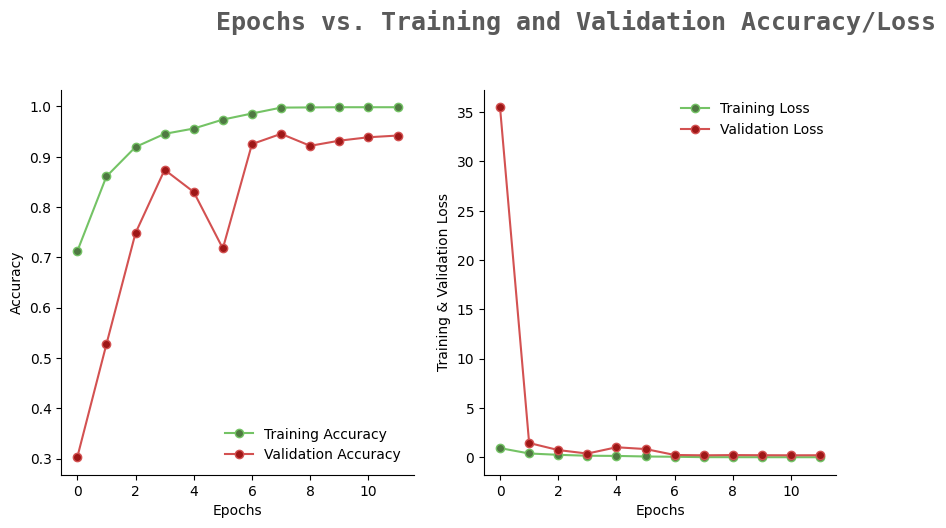

In [ ]:
#filterwarnings('ignore')

epochs = [i for i in range(12)]
fig, ax = plt.subplots(1,2,figsize=(10,5))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',fontname='monospace',color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label ='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

11/11 [==============================] - 32s 3s/step


In [ ]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        97
           1       0.90      0.88      0.89        49
           2       0.93      0.94      0.93        97
           3       0.99      0.98      0.98        84

    accuracy                           0.94       327
   macro avg       0.94      0.94      0.94       327
weighted avg       0.94      0.94      0.94       327



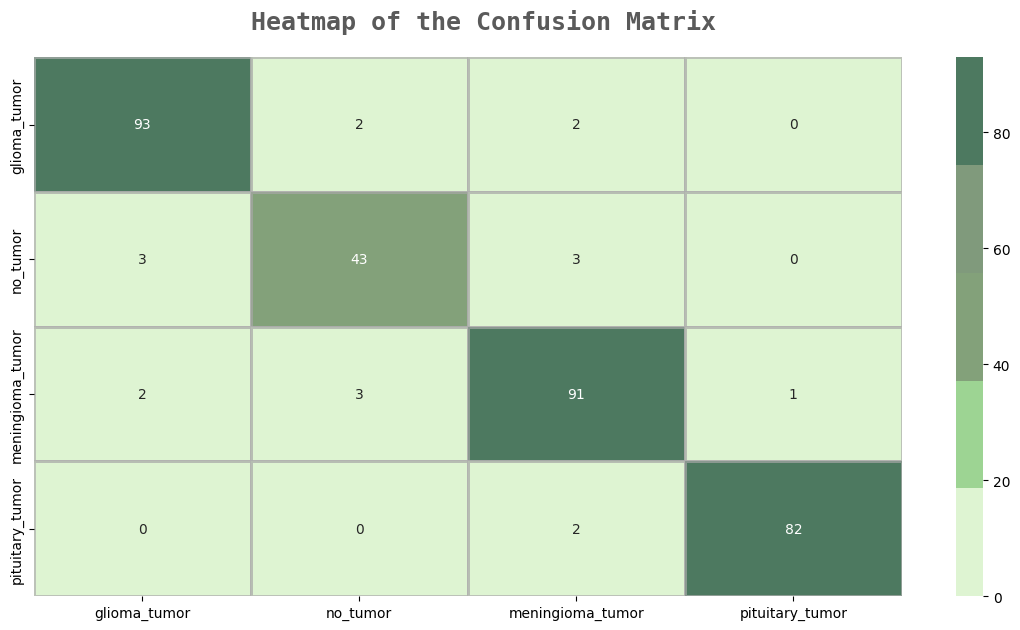

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

In [ ]:
def img_pred(upload):
    for name, file_info in uploader.value.items():
        img = Image.open(io.BytesIO(file_info['content']))
    opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    img = cv2.resize(opencvImage,(150,150))
    img = img.reshape(1,150,150,3)
    p = model.predict(img)
    p = np.argmax(p,axis=1)[0]

    if p==0:
        p='Glioma Tumor'
    elif p==1:
        print('The model predicts that there is no tumor')
    elif p==2:
        p='Meningioma Tumor'
    else:
        p='Pituitary Tumor'

    if p!=1:
        print(f'The Model predicts that it is a {p}')

In [ ]:
uploader = widgets.FileUpload()
display(uploader)

FileUpload(value={}, description='Upload')

In [ ]:
button = widgets.Button(description='Predict')
out = widgets.Output()
def on_button_clicked(_):
    with out:
        clear_output()
        try:
            img_pred(uploader)

        except:
            print('No Image Uploaded/Invalid Image File')
button.on_click(on_button_clicked)
widgets.VBox([button,out])

NameError: name 'widgets' is not defined